# ***Adult Census Income***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



**Loading necessary libraries**

In [ ]:

import pandas as pd
import missingno as msno
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import auc

**Loading dataset into dataframe**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project/adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
#Number of rows and columns
df.shape

(32561, 15)

**Display first & last 5 rows**

In [ ]:

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**summary statistics of the numerical columns**

In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**DataType**

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

**Checking duplicates**

In [ ]:
df.duplicated().sum()

24

**Droping duplicates**

In [ ]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Dropping the column "fnlwgt"

In [ ]:
df.drop(["fnlwgt"],axis=1,inplace=True)

**To find missing value**

In [ ]:
df.isna().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

**Data Cleaning**

Replacing Value

While checking the dataset there is '?' in the values.Replacing the '?' with NaN

In [ ]:
df["workclass"].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df.replace('?',np.nan,inplace=True)
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Again checking for missing value..

In [ ]:
df.isna().sum()

age                  0
workclass         1836
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Missing values shows in matrix diagram

<Axes: >

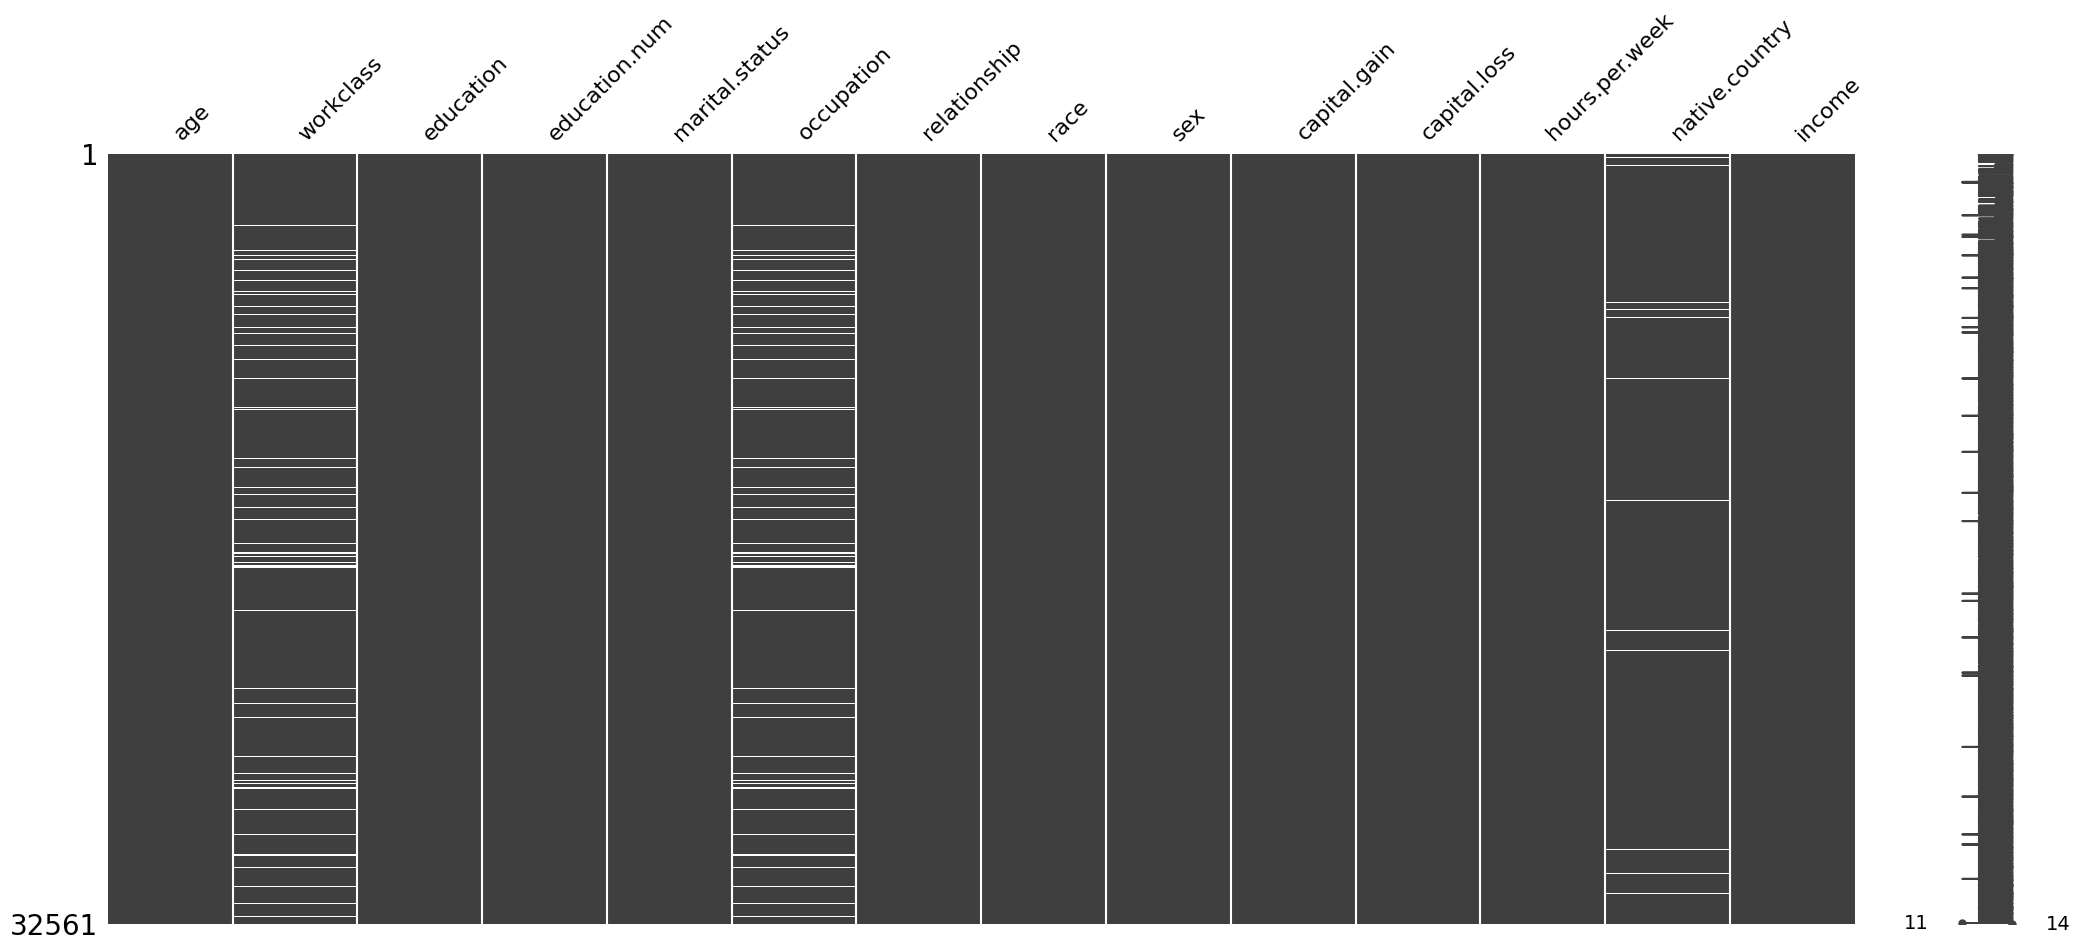

In [ ]:
msno.matrix(df)

Missing Value Handling

In [ ]:
df["workclass"]=df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"]=df["occupation"].fillna(df["occupation"].mode()[0])
df["native.country"]=df["native.country"].fillna(df["native.country"].mode()[0])

In [ ]:
df.isna().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Distribution of the income categories

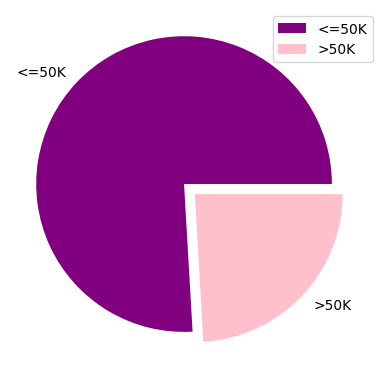

In [ ]:
t=df["income"].value_counts()
lbl=["<=50K",">50K"]
plt.pie(t,labels=lbl,explode=[0.1,0],colors=["Purple","pink"])
plt.legend()
plt.show()

Distribution of income by education

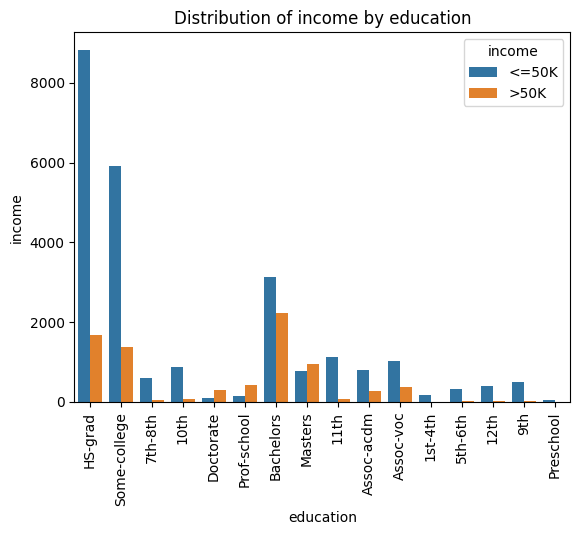

In [ ]:
sns.countplot(x="education",data=df,hue="income")
plt.title("Distribution of income by education")
plt.xlabel("education")
plt.ylabel("income")
plt.xticks(rotation=90)
plt.show()

Distribution of income by occupation

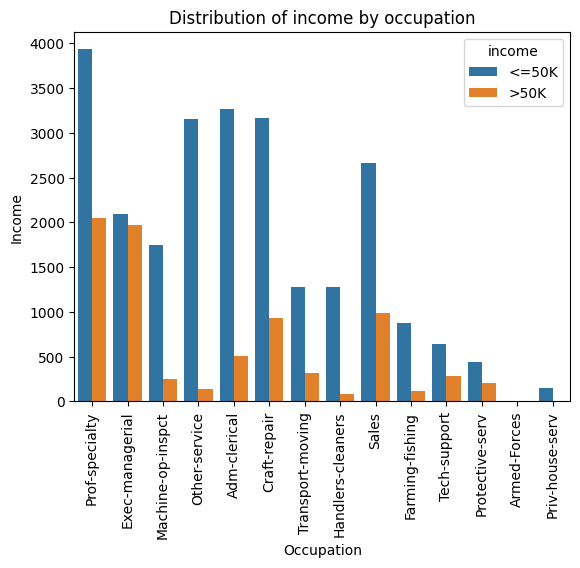

In [ ]:
sns.countplot(x="occupation",data=df,hue="income")
plt.title("Distribution of income by occupation")
plt.xlabel("Occupation")
plt.ylabel("Income")
plt.xticks(rotation=90)
plt.show()

Distribution of income by Marital status  & hours per week

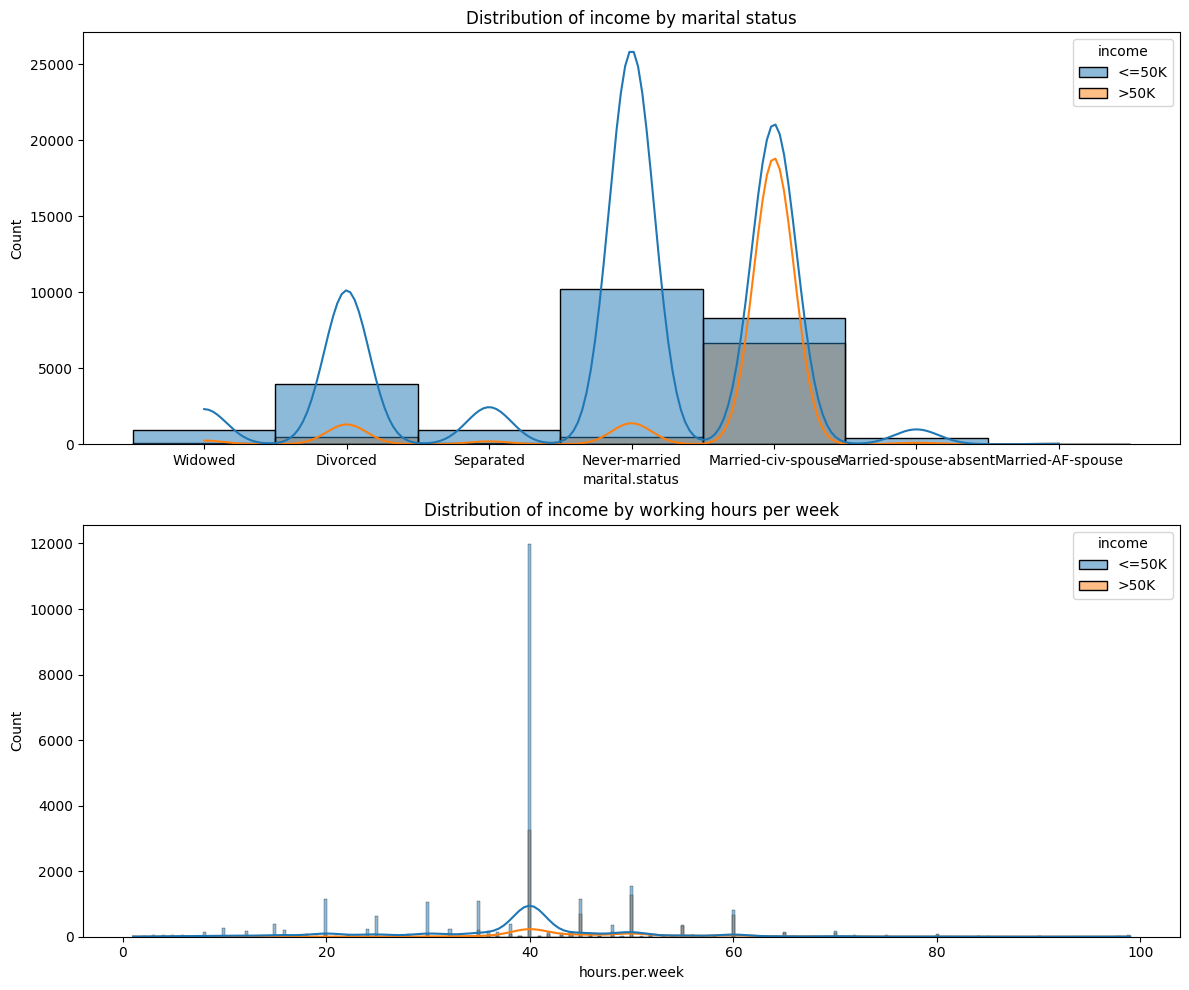

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.histplot(df,x="marital.status",hue="income",kde=True)
plt.title("Distribution of income by marital status")




plt.subplot(2,1,2)
sns.histplot(df,x="hours.per.week",hue="income",kde=True)
plt.title("Distribution of income by working hours per week")





plt.tight_layout()
plt.show()

Distribution of income by capital gain & capital loss

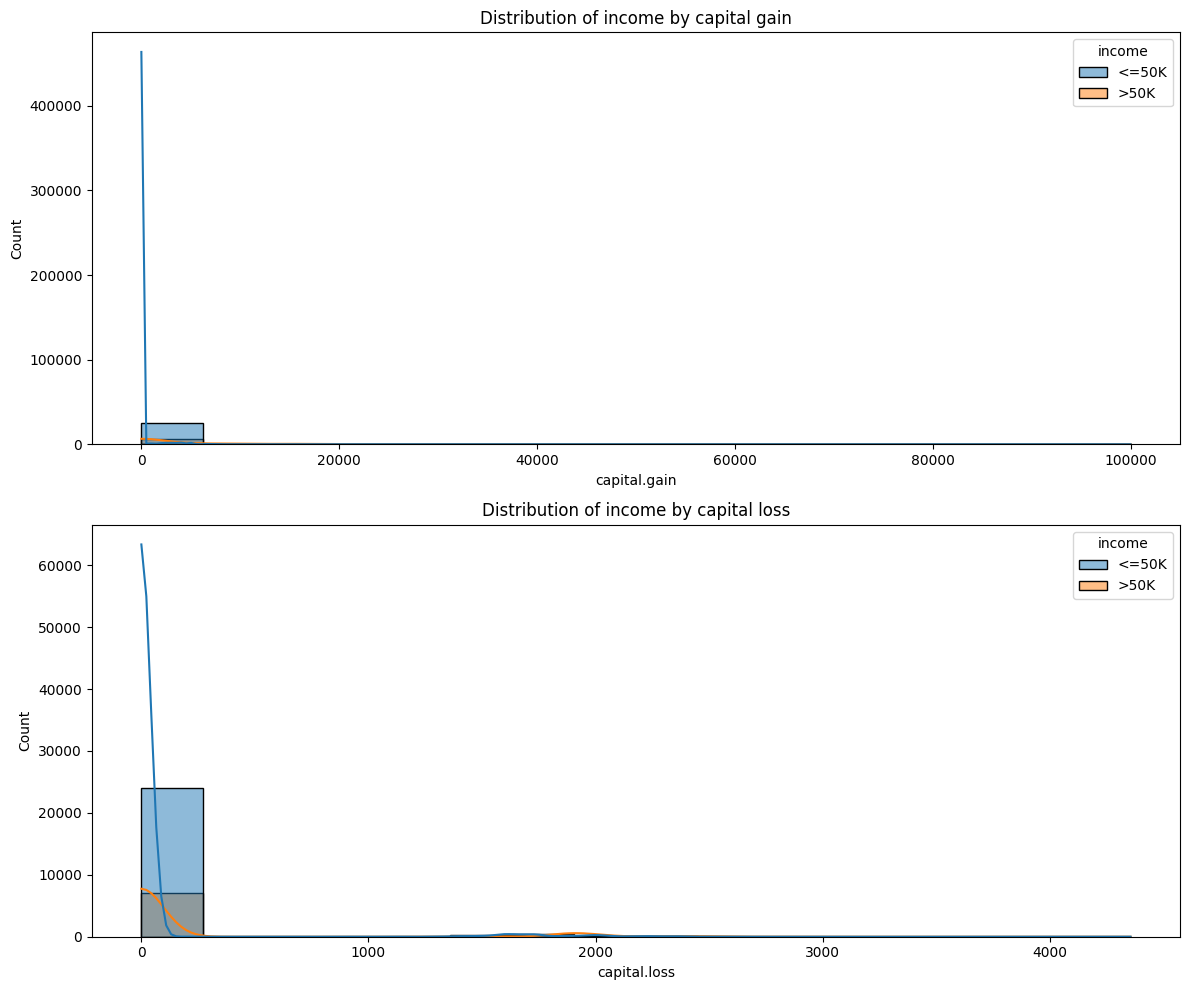

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.histplot(df,x="capital.gain",hue="income",kde=True)
plt.title("Distribution of income by capital gain")


plt.subplot(2,1,2)
sns.histplot(df,x="capital.loss",hue="income",kde=True)
plt.title("Distribution of income by capital loss")


plt.tight_layout()
plt.show()

 Distribution of income by sex

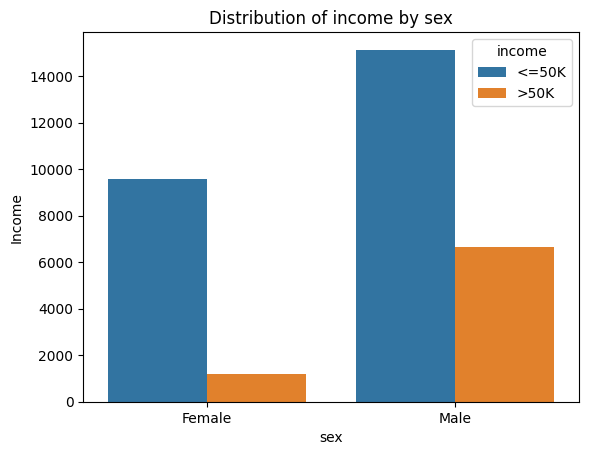

In [ ]:
sns.countplot(x="sex",data=df,hue="income")
plt.title("Distribution of income by sex")
plt.xlabel("sex")
plt.ylabel("Income")
plt.show()

**Encoding**

In [ ]:
encoder=LabelEncoder()
df["workclass"]=encoder.fit_transform(df["workclass"])
df["education"]=encoder.fit_transform(df["education"])
df["marital.status"]=encoder.fit_transform(df["marital.status"])
df["occupation"]=encoder.fit_transform(df["occupation"])
df["relationship"]=encoder.fit_transform(df["relationship"])
df["race"]=encoder.fit_transform(df["race"])
df["sex"]=encoder.fit_transform(df["sex"])
df["native.country"]=encoder.fit_transform(df["native.country"])
df["income"]=encoder.fit_transform(df["income"])

df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,15,10,5,9,3,4,0,0,3900,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,3,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,3,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,3,11,9,6,0,4,4,0,0,0,40,38,0


**Finding Outliers**

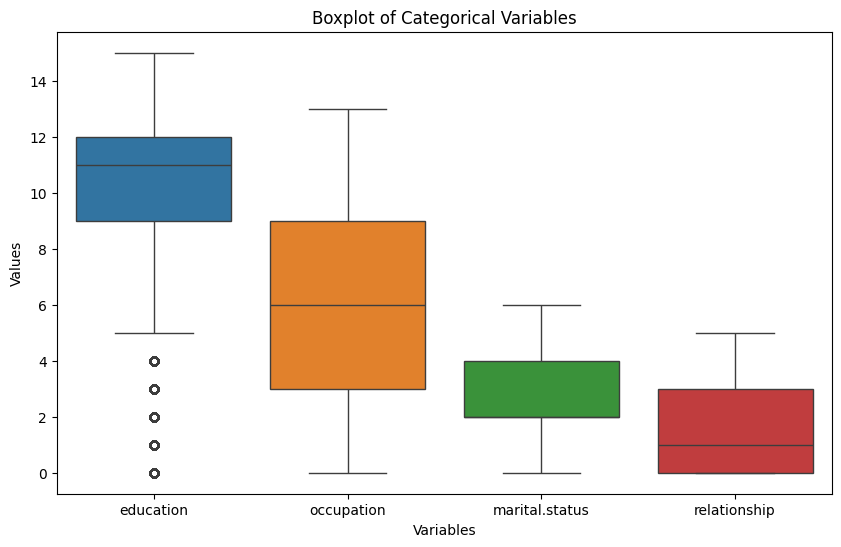

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["education", "occupation", "marital.status", "relationship"]])

plt.title("Boxplot of Categorical Variables")
plt.xlabel("Variables")
plt.ylabel("Values")

plt.show()

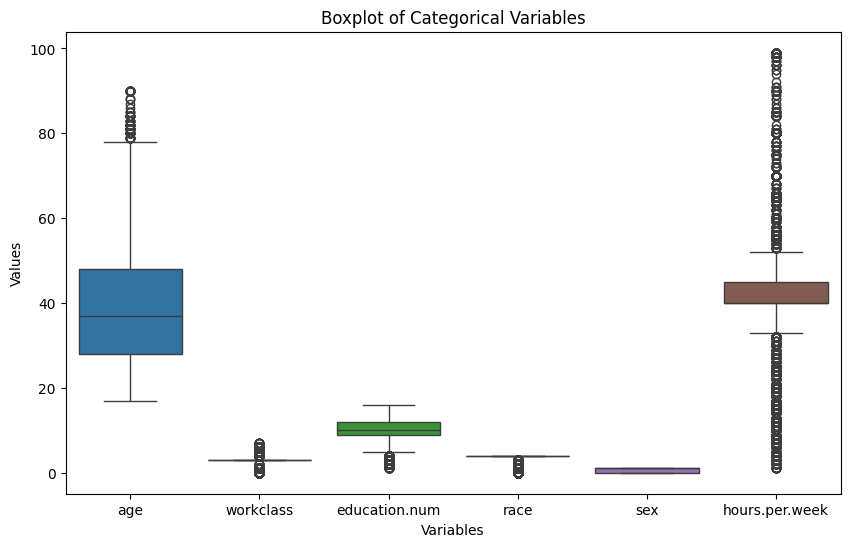

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["age",	"workclass","education.num","race",	"sex","hours.per.week" ]])

plt.title("Boxplot of Categorical Variables")
plt.xlabel("Variables")
plt.ylabel("Values")

plt.show()

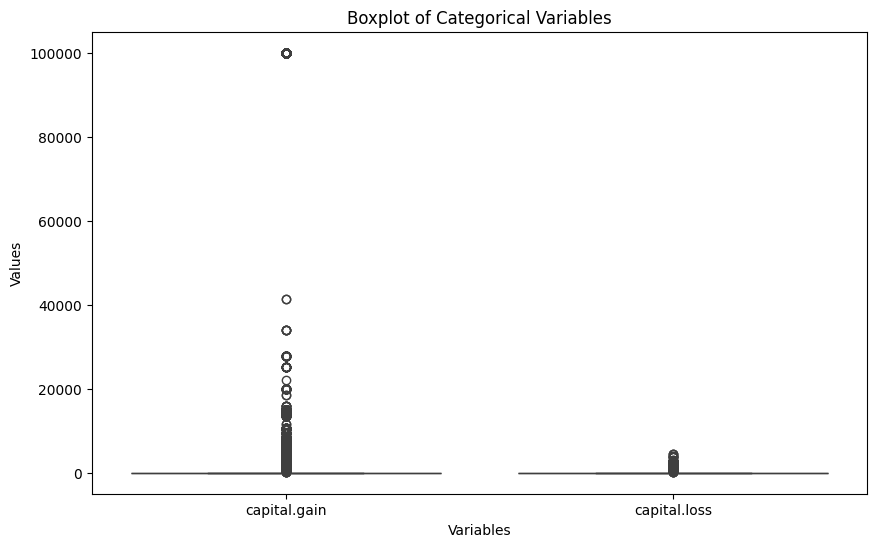

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["capital.gain","capital.loss" ]])

plt.title("Boxplot of Categorical Variables")
plt.xlabel("Variables")
plt.ylabel("Values")

plt.show()

**Removing outliers**

In [ ]:
features_with_outliers=["education","age","education.num",	"sex","hours.per.week",]

In [ ]:
for i in features_with_outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - IQR * 1.5
    upper_limit = q3 + IQR * 1.5

    # Replace outliers with the lower and upper limit
    df.loc[df[i] < lower_limit, i] = lower_limit
    df.loc[df[i] > upper_limit, i] = upper_limit



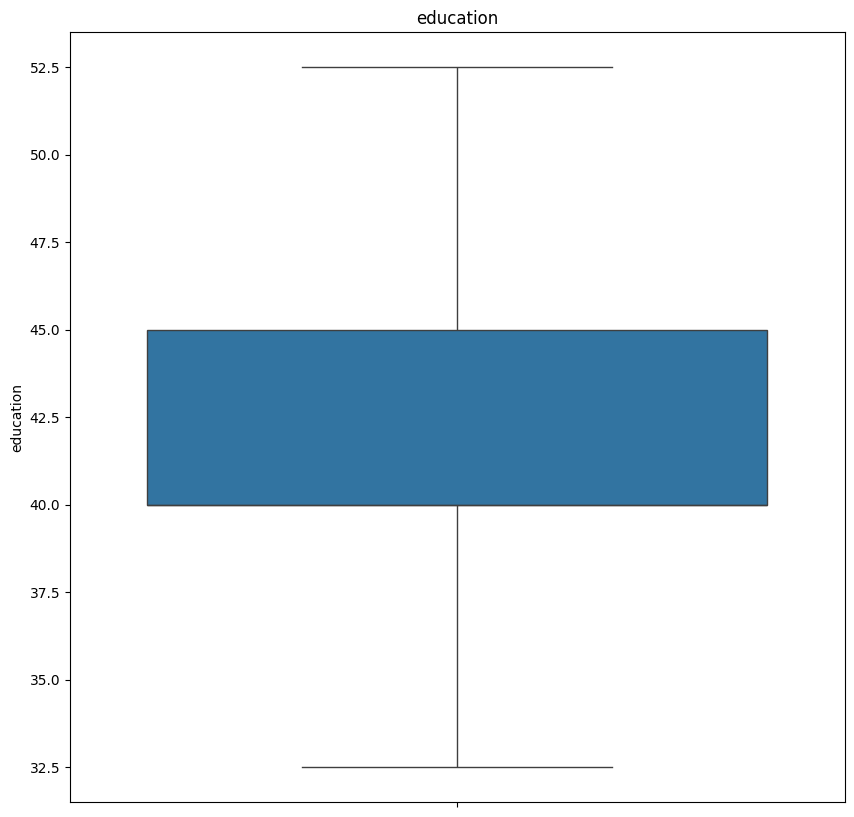

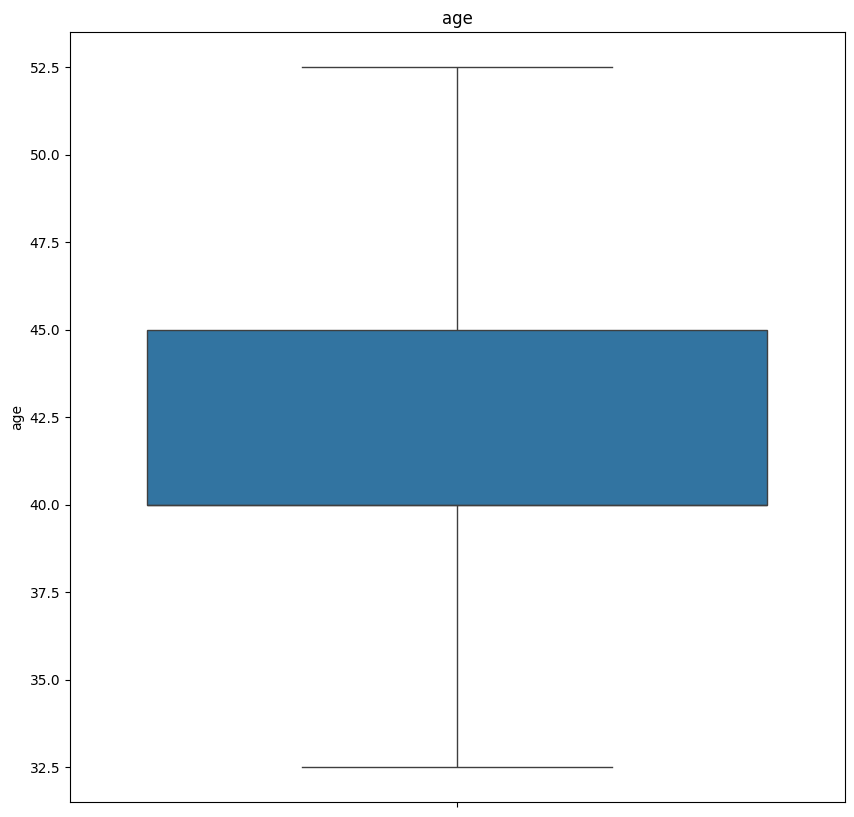

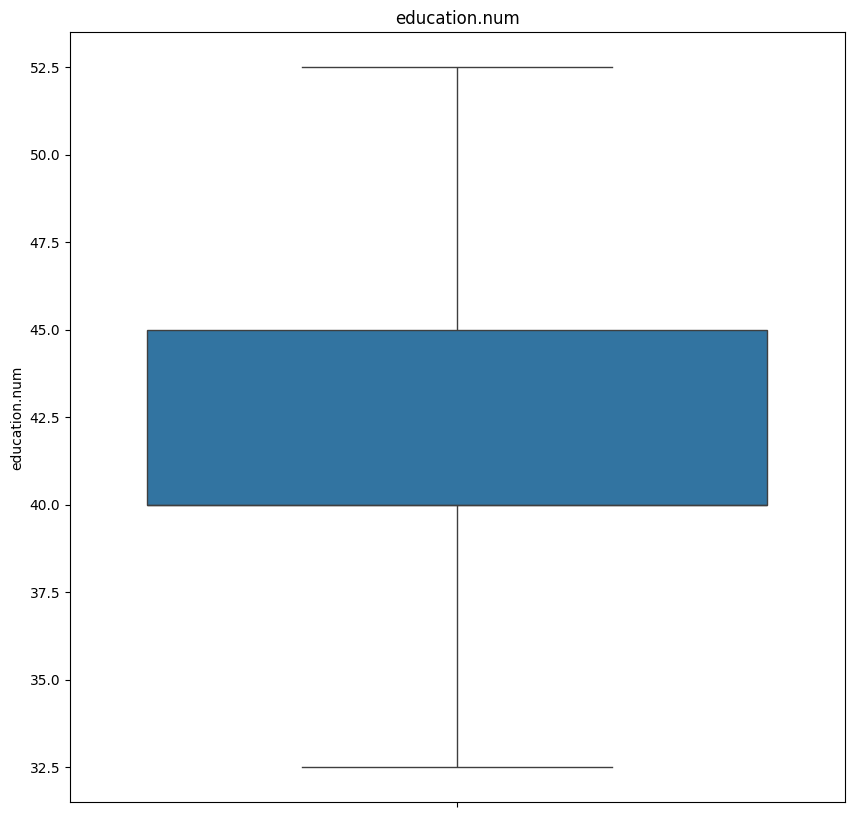

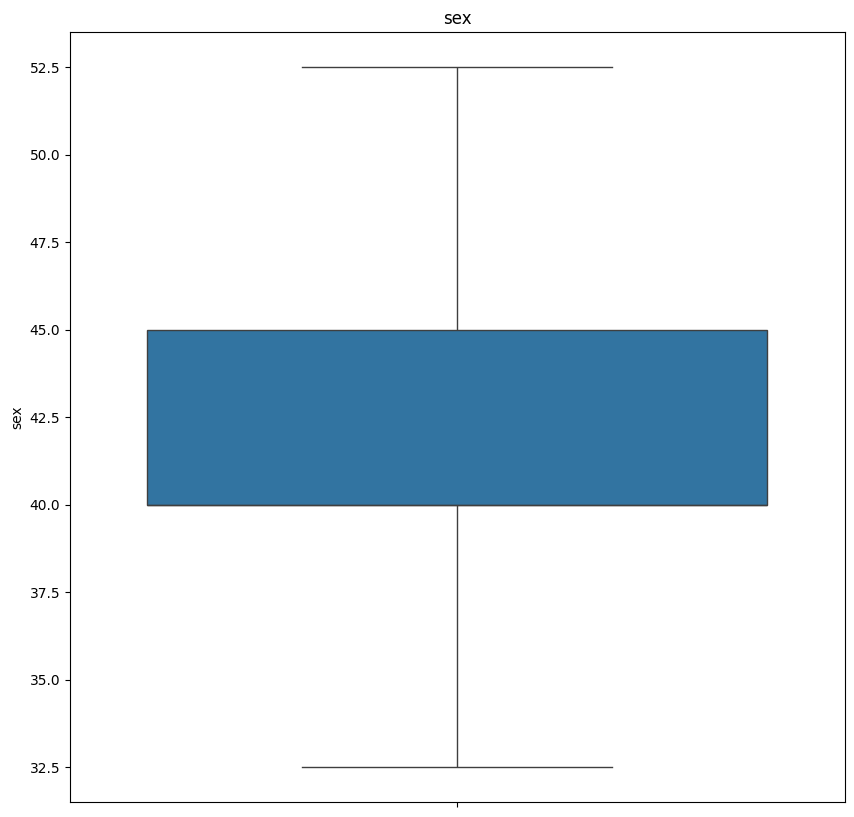

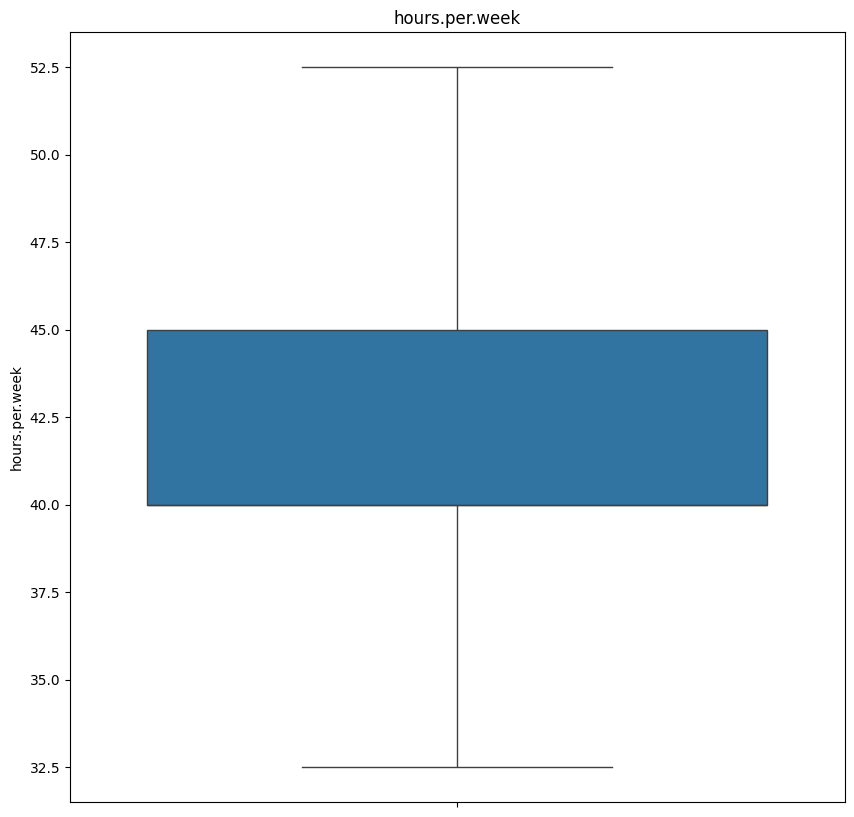

In [ ]:
for j in features_with_outliers:
  plt.figure(figsize=(10,10))
  sns.boxplot(df[i])
  plt.title(j)
  plt.ylabel(j)
  plt.show()

**Separating Features and Target Variable**

In [ ]:
X=df.iloc[:,:-1]
X

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,78,3,11.0,9.0,6,9,1,4,0.0,0,4356,40.0,38
1,78,3,11.0,9.0,6,3,1,4,0.0,0,4356,32.5,38
2,66,3,15.0,10.0,6,9,4,2,0.0,0,4356,40.0,38
3,54,3,5.0,4.5,0,6,4,4,0.0,0,3900,40.0,38
4,41,3,15.0,10.0,5,9,3,4,0.0,0,3900,40.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,15.0,10.0,4,10,1,4,1.0,0,0,40.0,38
32557,27,3,7.0,12.0,2,12,5,4,0.0,0,0,38.0,38
32558,40,3,11.0,9.0,2,6,0,4,1.0,0,0,40.0,38
32559,58,3,11.0,9.0,6,0,4,4,0.0,0,0,40.0,38


In [ ]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 2.90975392, -0.08529633,  0.12493525, ..., 10.59350656,
        -0.194354  ,  0.26136999],
       [ 2.90975392, -0.08529633,  0.12493525, ..., 10.59350656,
        -1.40659071,  0.26136999],
       [ 2.02453194, -0.08529633,  1.37288882, ..., 10.59350656,
        -0.194354  ,  0.26136999],
       ...,
       [ 0.10655097, -0.08529633,  0.12493525, ..., -0.21665953,
        -0.194354  ,  0.26136999],
       [ 1.43438395, -0.08529633,  0.12493525, ..., -0.21665953,
        -0.194354  ,  0.26136999],
       [-1.221282  , -0.08529633,  0.12493525, ..., -0.21665953,
        -1.40659071,  0.26136999]])

**Splitting Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

**Model Creation**

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7368
           1       0.67      0.59      0.63      2401

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.82      0.83      0.82      9769

82.87439860784113
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SVC()
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7368
           1       0.77      0.56      0.65      2401

    accuracy                           0.85      9769
   macr

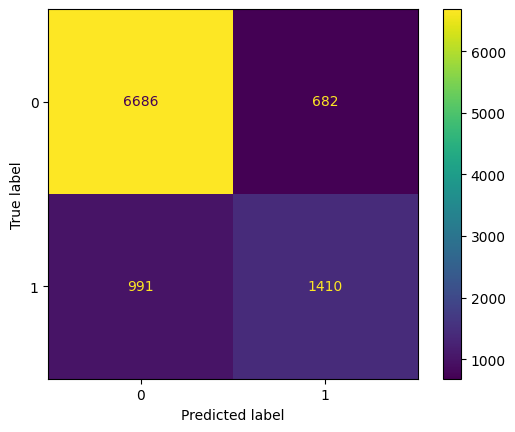

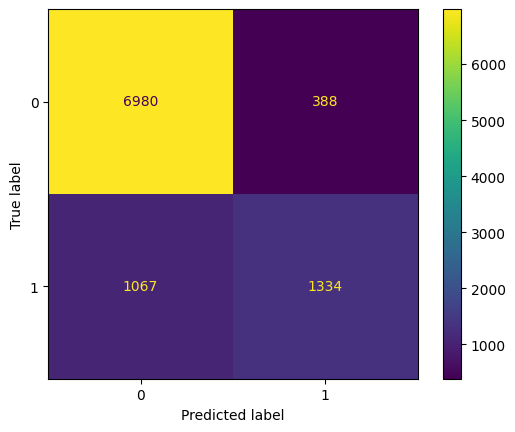

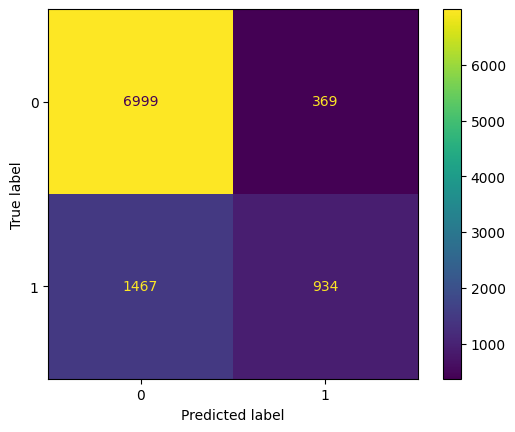

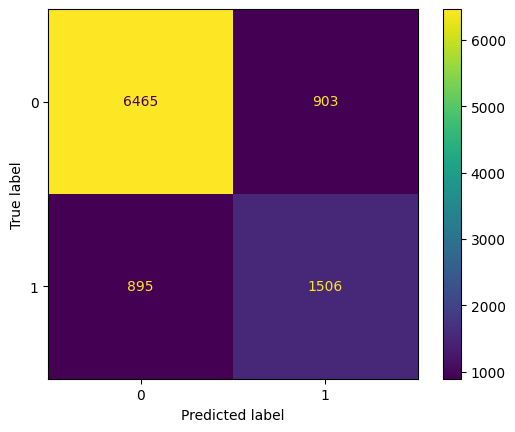

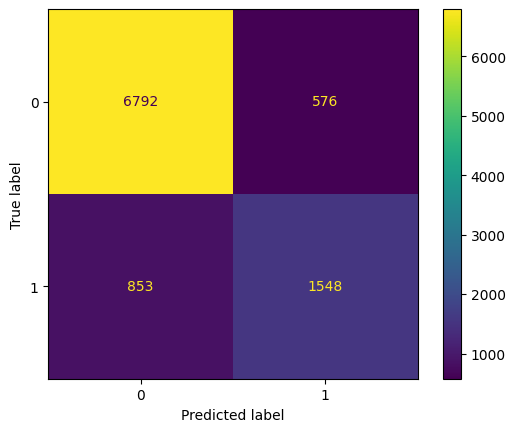

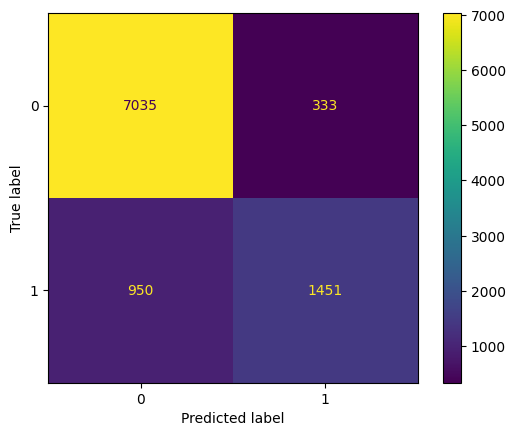

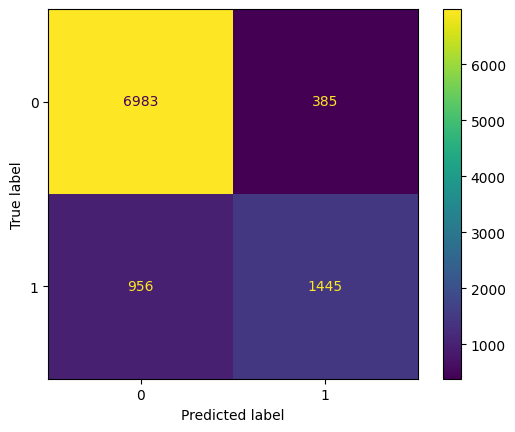

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
ad=AdaBoostClassifier(random_state=1)

accuracy_scores=[]
model=[knn,sv,nb,dt,rf,gb,ad]
for select in model:
  print(select)
  select.fit(X_train,y_train)
  y_pred=select.predict(X_test)
  y_pred
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  accuracy=accuracy_score(y_test,y_pred)*100
  print(accuracy)
  accuracy_scores.append(accuracy)
  print("--"*200)

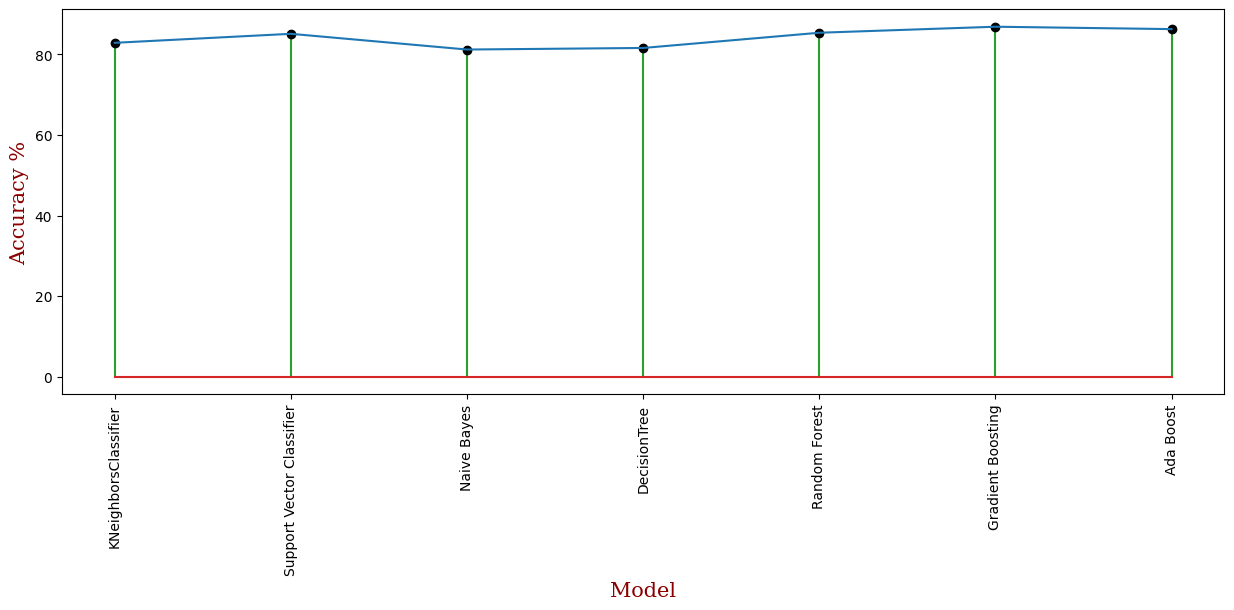

In [ ]:
model_name=["KNeighborsClassifier","Support Vector Classifier","Naive Bayes","DecisionTree","Random Forest","Gradient Boosting","Ada Boost"]
c=accuracy_scores
x=model_name
plt.figure(figsize=(15,5))
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Model",fontdict = font2)
plt.ylabel("Accuracy %",fontdict = font2)
plt.xticks(rotation=90)
plt.stem(x, c, linefmt='C2o-', markerfmt='k')
plt.plot(x,c)

**Feature value selection**

In [ ]:
df.corr()["income"]

age               0.235865
workclass         0.002693
education         0.056010
education.num     0.342274
marital.status   -0.199307
occupation        0.034625
relationship     -0.250918
race              0.071846
sex               0.215980
capital.gain      0.223329
capital.loss      0.150526
hours.per.week    0.271055
native.country    0.023058
income            1.000000
Name: income, dtype: float64

**Correlation Matrix**

Text(0.5, 1.0, 'Correlation Heatmap')

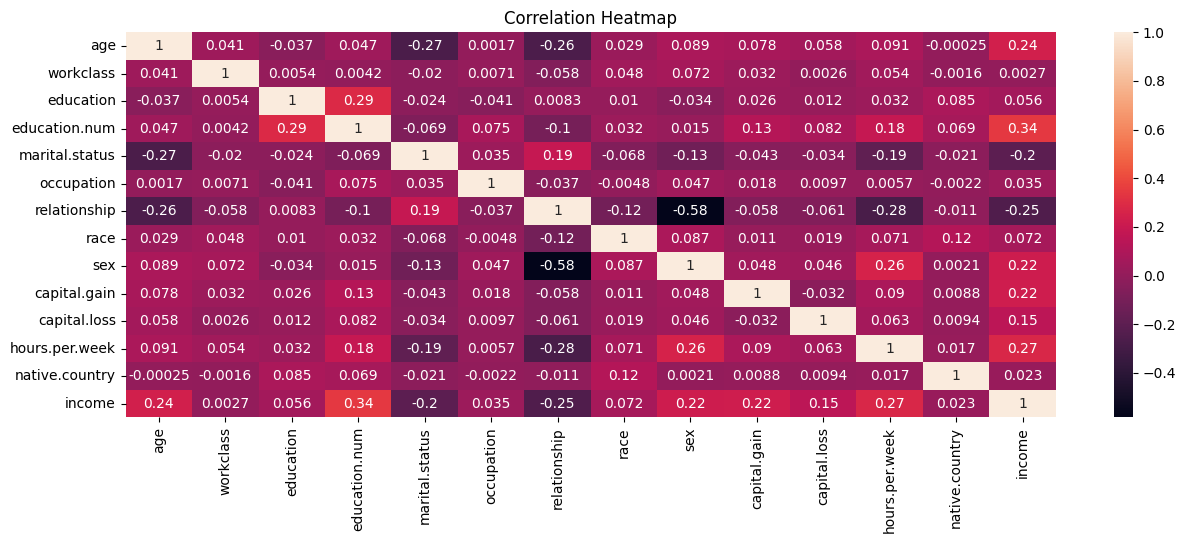

In [ ]:
plt.figure(figsize=(15,5))
heatmap=sns.heatmap(df.corr(),annot=True)
heatmap.set_title("Correlation Heatmap")

In [ ]:
df.drop(["workclass","relationship","race","native.country"],axis=1,inplace=True)

In [ ]:
df

,age,education,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,income
0,78,11.0,9.0,6,9,0.0,0,4356,40.0,0
1,78,11.0,9.0,6,3,0.0,0,4356,32.5,0
2,66,15.0,10.0,6,9,0.0,0,4356,40.0,0
3,54,5.0,4.5,0,6,0.0,0,3900,40.0,0
4,41,15.0,10.0,5,9,0.0,0,3900,40.0,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,15.0,10.0,4,10,1.0,0,0,40.0,0
32557,27,7.0,12.0,2,12,0.0,0,0,38.0,0
32558,40,11.0,9.0,2,6,1.0,0,0,40.0,1
32559,58,11.0,9.0,6,0,0.0,0,0,40.0,0


Splitting DataFrame into X & y using featured selection


In [ ]:
X_f=df.iloc[:,:-1]
X_f

,age,education,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week
0,78,11.0,9.0,6,9,0.0,0,4356,40.0
1,78,11.0,9.0,6,3,0.0,0,4356,32.5
2,66,15.0,10.0,6,9,0.0,0,4356,40.0
3,54,5.0,4.5,0,6,0.0,0,3900,40.0
4,41,15.0,10.0,5,9,0.0,0,3900,40.0
...,...,...,...,...,...,...,...,...,...
32556,22,15.0,10.0,4,10,1.0,0,0,40.0
32557,27,7.0,12.0,2,12,0.0,0,0,38.0
32558,40,11.0,9.0,2,6,1.0,0,0,40.0
32559,58,11.0,9.0,6,0,0.0,0,0,40.0


In [ ]:
y_f=df.iloc[:,-1]
y_f

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

scaling

In [ ]:
scaler=StandardScaler()
X_scaled_f=scaler.fit_transform(X_f)
X_scaled_f

array([[ 2.90975392,  0.12493525, -0.45709061, ..., -0.14592048,
        10.59350656, -0.194354  ],
       [ 2.90975392,  0.12493525, -0.45709061, ..., -0.14592048,
        10.59350656, -1.40659071],
       [ 2.02453194,  1.37288882, -0.05054229, ..., -0.14592048,
        10.59350656, -0.194354  ],
       ...,
       [ 0.10655097,  0.12493525, -0.45709061, ..., -0.14592048,
        -0.21665953, -0.194354  ],
       [ 1.43438395,  0.12493525, -0.45709061, ..., -0.14592048,
        -0.21665953, -0.194354  ],
       [-1.221282  ,  0.12493525, -0.45709061, ..., -0.14592048,
        -0.21665953, -1.40659071]])

**Splitting Train Test Data**

In [ ]:
X_train_f,X_test_f,y_train_f,y_test_f=train_test_split(X_scaled_f,y_f,test_size=0.3,random_state=1)

In [ ]:
X_train_f

array([[ 0.69669896,  0.12493525, -0.45709061, ..., -0.14592048,
        -0.21665953, -1.40659071],
       [ 0.25408797,  0.43692364,  1.57565099, ..., -0.14592048,
        -0.21665953, -0.194354  ],
       [-1.1475135 ,  1.37288882, -0.05054229, ..., -0.14592048,
         4.6821623 , -0.194354  ],
       ...,
       [ 0.77046746,  1.37288882, -0.05054229, ..., -0.14592048,
        -0.21665953, -0.194354  ],
       [ 1.95076344,  1.37288882, -0.05054229, ..., -0.14592048,
         5.17849683, -0.194354  ],
       [-0.55736551,  1.37288882, -0.05054229, ..., -0.14592048,
        -0.21665953,  1.82604052]])

In [ ]:
y_train_f

16525    0
14551    0
518      0
22524    1
11425    0
        ..
32511    1
5192     1
12172    0
235      1
29733    0
Name: income, Length: 22792, dtype: int64

Machine Learning Algorithms (feature selection)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7368
           1       0.68      0.61      0.64      2401

    accuracy                           0.83      9769
   macro avg       0.78      0.76      0.77      9769
weighted avg       0.83      0.83      0.83      9769

83.3964581840516
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SVC()
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7368
           1       0.77      0.55      0.65      2401

    accuracy                           0.85      9769
   macro

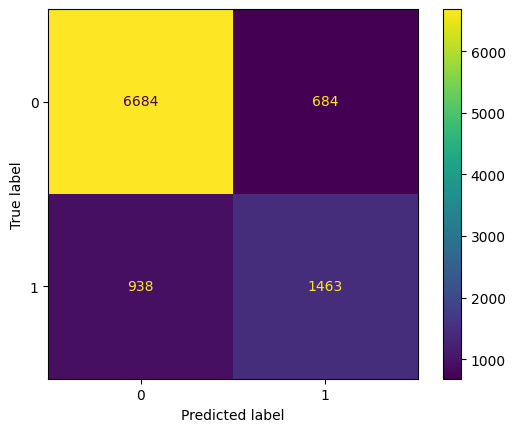

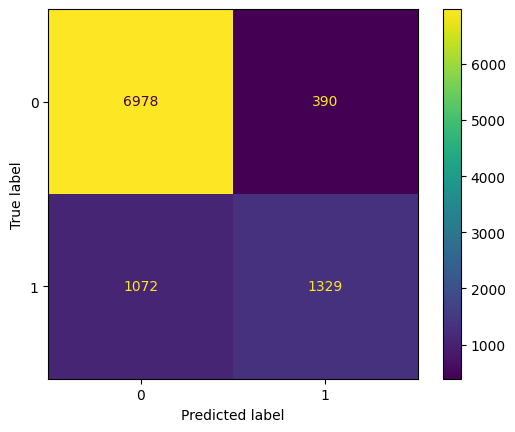

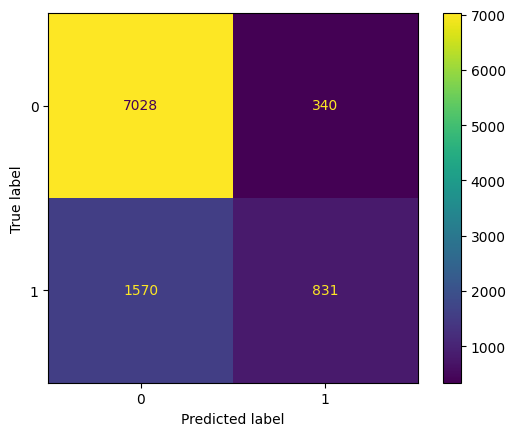

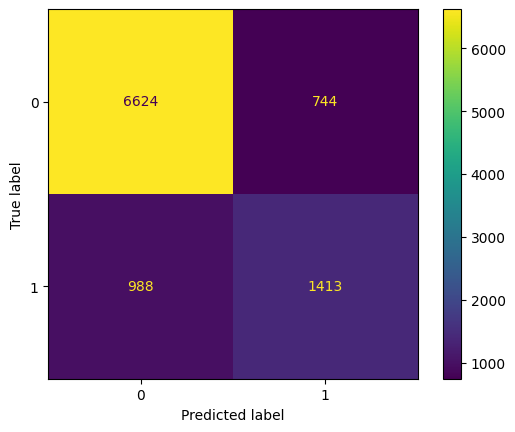

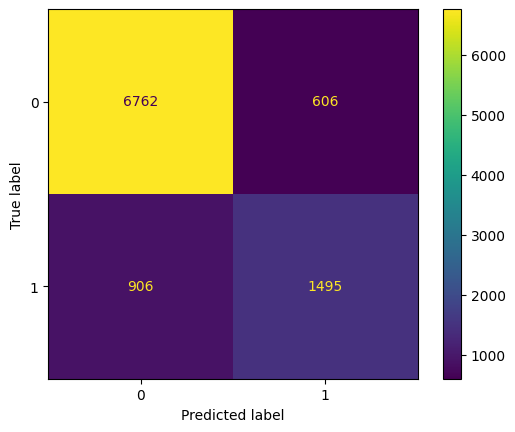

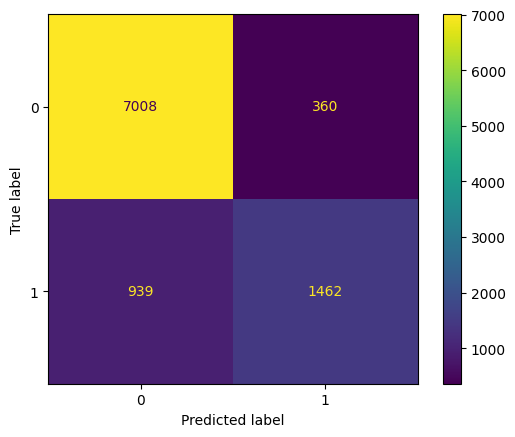

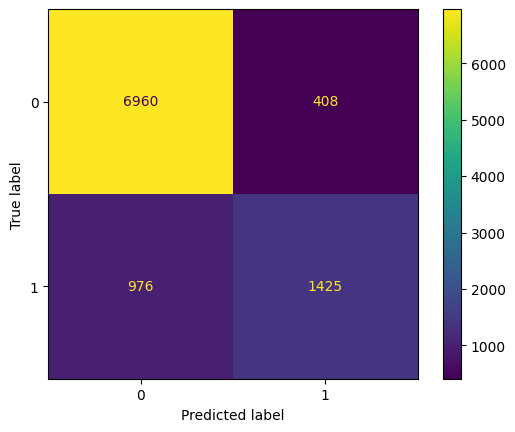

In [ ]:
knn_f=KNeighborsClassifier()
sv_f=SVC()
nb_f=GaussianNB()
dt_f=DecisionTreeClassifier(random_state=1)
rf_f=RandomForestClassifier(random_state=1)
gb_f=GradientBoostingClassifier(random_state=1)
ad_f=AdaBoostClassifier(random_state=1)

accuracy_scoresf=[]
model=[knn,sv,nb,dt,rf,gb,ad]
for select in model:
  print(select)
  select.fit(X_train_f,y_train_f)
  y_pred_f=select.predict(X_test_f)
  y_pred_f
  print(classification_report(y_test_f,y_pred_f))
  print(ConfusionMatrixDisplay.from_predictions(y_test_f,y_pred_f))
  accuracy=accuracy_score(y_test_f,y_pred_f)*100
  print(accuracy)
  accuracy_scoresf.append(accuracy)
  print("--"*200)

Ploting accuracy score in each model

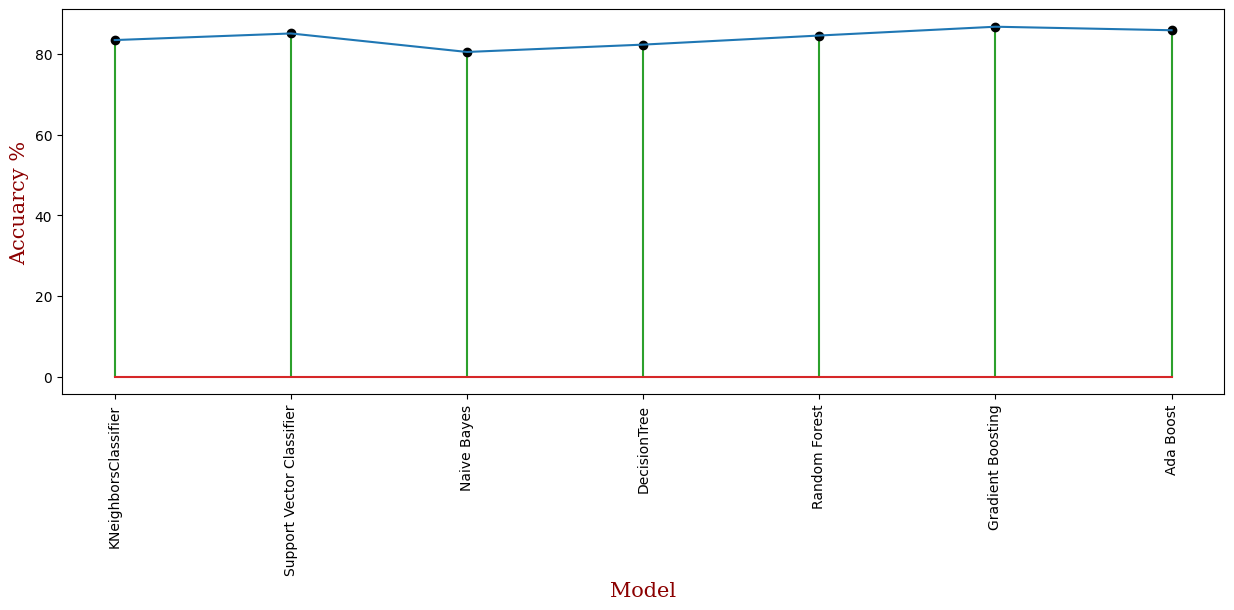

In [ ]:
model_name=["KNeighborsClassifier","Support Vector Classifier","Naive Bayes","DecisionTree","Random Forest","Gradient Boosting","Ada Boost"]
c=accuracy_scoresf
x=model_name
plt.figure(figsize=(15,5))
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Model",fontdict = font2)
plt.ylabel("Accuarcy %",fontdict = font2)
plt.xticks(rotation=90)
plt.stem(x, c, linefmt='C2o-', markerfmt='k')
plt.plot(x,c)


Comparing accuracy of Model before  and after using Feature selection

In [ ]:
models=["knn","sv","nb","dt","rf","gb","ad"]
result=pd.DataFrame({"Models":models,"Accuracy":accuracy_scores,"Accuracy_f":accuracy_scoresf})
result

,Models,Accuracy,Accuracy_f
0,knn,82.874399,83.396458
1,sv,85.105947,85.034292
2,nb,81.205855,80.448357
3,dt,81.594841,82.270447
4,rf,85.372095,84.522469
5,gb,86.866619,86.702836
6,ad,86.272904,85.832736


ploting accuracy of Model before  and after using Feature selection

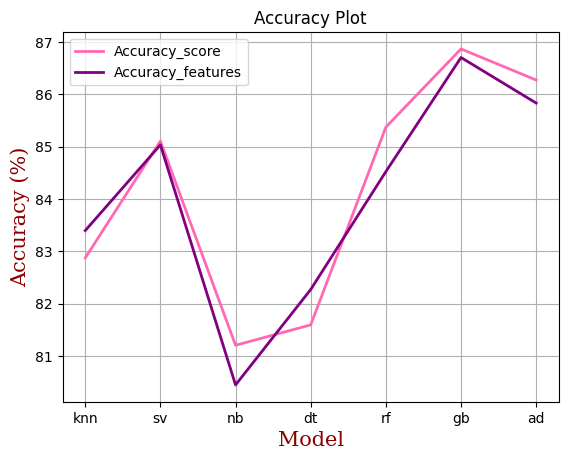

In [ ]:
plt.plot(models,accuracy_scores,color='hotpink',linewidth=2,label="Accuracy_score")
plt.plot(models,accuracy_scoresf,color='purple',linewidth=2,label="Accuracy_features")

font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Accuracy Plot")
plt.xlabel("Model",fontdict = font2)
plt.ylabel("Accuracy (%)",fontdict = font2)
plt.grid(True)
plt.legend()
plt.show()

**Sampling**

calculating the imbalance of data

In [ ]:
class_counts=y.value_counts()
max_count=class_counts.max()
min_count=class_counts.min()
skewness_ratio=max_count/min_count
print(f'skewness_ratio:{skewness_ratio}')

skewness_ratio:3.152659099604642


Oversampling

In [ ]:

os=SMOTE(random_state=42)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_os.shape

(49440, 13)

In [ ]:
y_os.shape

(49440,)

In [ ]:
scaler=StandardScaler()
X_os_scaled=scaler.fit_transform(X_os,y_os)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7485
           1       0.83      0.89      0.86      7347

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832

85.27508090614887
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SVC()
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      7485
           1       0.82      0.90      0.86      7347

    accuracy                           0.85     14832
   macr

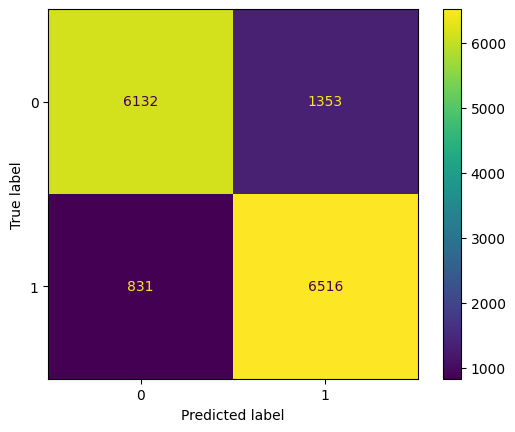

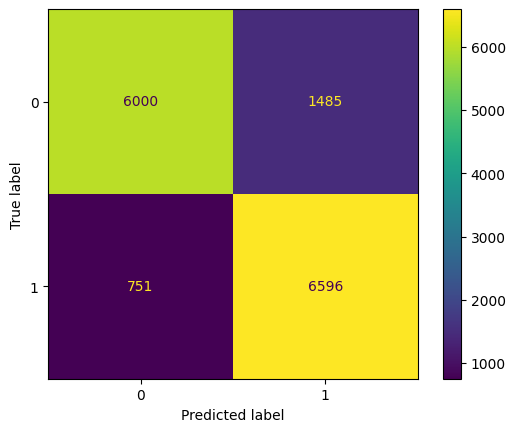

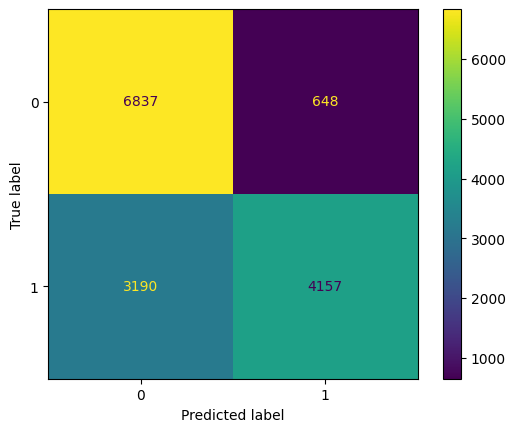

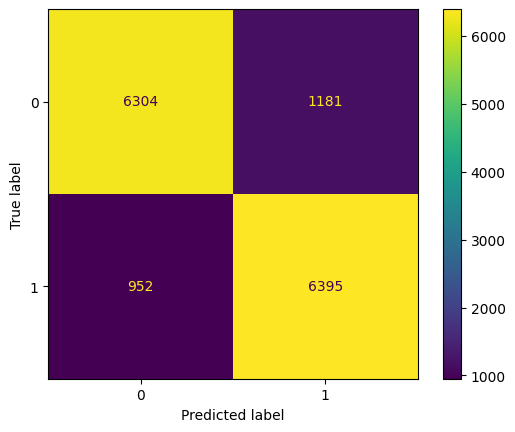

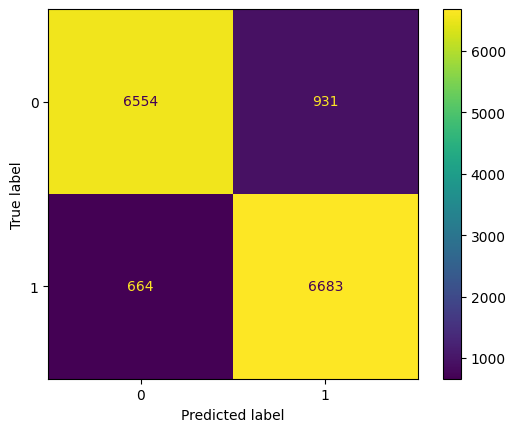

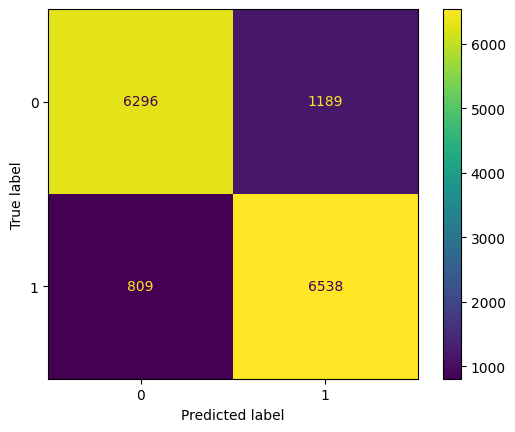

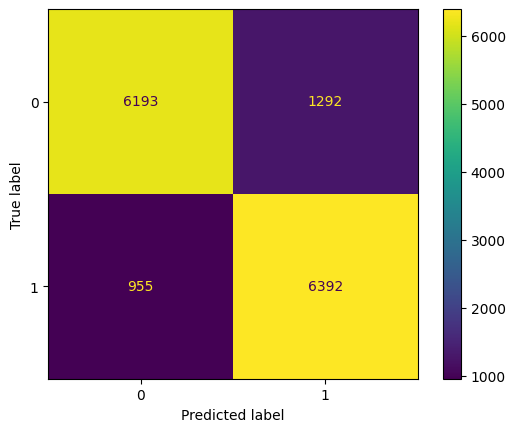

In [ ]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=1)
knn_os=KNeighborsClassifier()
sv_os=SVC()
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier(random_state=1)
rf_os=RandomForestClassifier(random_state=1)
gb_os=GradientBoostingClassifier(random_state=1)
ad_os=AdaBoostClassifier(random_state=1)

accuracy_scores_os=[]
model=[knn_os,sv_os,nb_os,dt_os,rf_os,gb_os,ad_os]
for select in model:
  print(select)
  select.fit(X_os_train,y_os_train)
  y_os_pred=select.predict(X_os_test)
  y_os_pred
  print(classification_report(y_os_test,y_os_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred))
  accuracy_os=accuracy_score(y_os_test,y_os_pred)*100
  print(accuracy_os)
  accuracy_scores_os.append(accuracy_os)
  print("--"*200)


Comparing Accuracy  of model before feature selection ,Oversampling model

In [ ]:
models=["knn","sv","nb","dt","rf","gb","ad"]
result=pd.DataFrame({"Models":models,"Accuracy":accuracy_scores,"Accuracy_os":accuracy_scores_os})
result

,Models,Accuracy,Accuracy_os
0,knn,82.874399,85.275081
1,sv,85.105947,84.924488
2,nb,81.205855,74.123517
3,dt,81.594841,85.618932
4,rf,85.372095,89.246224
5,gb,86.866619,86.529126
6,ad,86.272904,84.850324


<function matplotlib.pyplot.show(close=None, block=None)>

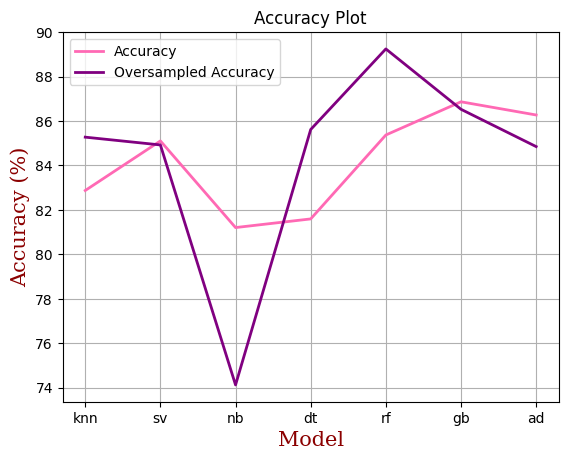

In [ ]:
plt.plot(models,accuracy_scores,color='hotpink',linewidth=2,label='Accuracy')
plt.plot(models,accuracy_scores_os,color='purple',linewidth=2,label='Oversampled Accuracy')
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Accuracy Plot")
plt.xlabel("Model",fontdict = font2)
plt.ylabel("Accuracy (%)",fontdict = font2)
plt.grid(True)
plt.legend()
plt.show

**Hyperparameter Tuning**

Random forest have high accuracy.So it tuned for hyperparameter tuning

**RandomForestclassifier**

In [ ]:
params={'n_estimators':[20,40,80,100],'criterion':['gini','entropy','log_loss'],'max_features':['sqrt', 'log2', None]}
clf=RandomizedSearchCV(rf_os,params,cv=10,scoring='accuracy')
clf.fit(X_os_train,y_os_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [20, 40, 80, 100]},
                   scoring='accuracy')

In [ ]:
clf.best_params_

{'n_estimators': 80, 'max_features': 'log2', 'criterion': 'log_loss'}

In [ ]:
y_pred1=clf.predict(X_os_test)
y_pred1
print(classification_report(y_os_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7485
           1       0.88      0.91      0.89      7347

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



Receiver operating characteristics & Area under curve

In [ ]:

clf_probs=clf.predict_proba(X_os_test)
preds=clf_probs[:,-1]
fpr,tpr,threshold=metrics.roc_curve(y_os_test,preds)
roc_auc=metrics.auc(fpr,tpr)

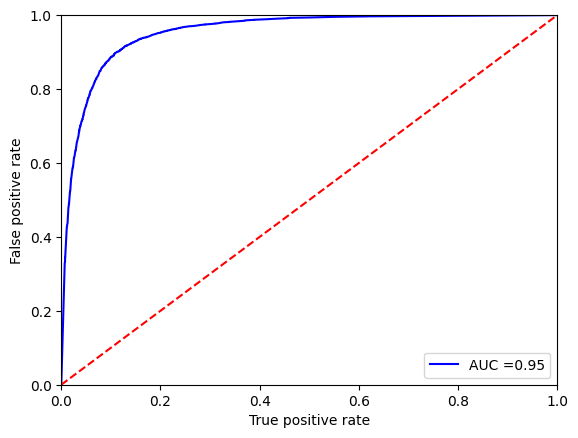

In [ ]:
plt.plot(fpr,tpr,'b',label="AUC =%0.2f" %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.show()


In [ ]:
import pickle
pickle.dump(clf,open("income_prediction.sav","wb"))
pickle.dump(scaler,open("StandardScaler.sav","wb"))